In [1]:
#Import library yang dibutuhkan untuk proses pre-processing
import pandas as pd
import numpy as np
import string #library untuk bekerja dengan text
import re #import modul regular expression # regex untuk membersihkan kata kata tweet

In [2]:
#Import data CSV yang ingin diproses dalam tahapan pre-processing
header_list = ["text","label"]
data_label = pd.read_csv('D:/crawling/prosesing ta1.csv', names=header_list)
data_label

,text,label
0,demi proses pendidikan yg ideal sya mendukung ...,Positif
1,sambut sekolah tatap muka sekolah di semarang ...,Positif
2,lihat hari ini puluhan sekolah di pemalang mul...,Positif
3,menko pmk muhadjir effendy meminta sekolah yan...,Positif
4,duh di petarukan pemalang sekolah tatap muka d...,Negatif
...,...,...
5193,siswa sd sampe gunungkidul sekolah tatap muka,Positif
5194,perintah kota tangerang selatan izin siswa gia...,Negatif
5195,timbang sekolah tatap muka hak asasi orang tua...,Negatif
5196,ombudsman jakarta raya pemprov dki jawa barat ...,Positif


<AxesSubplot:>

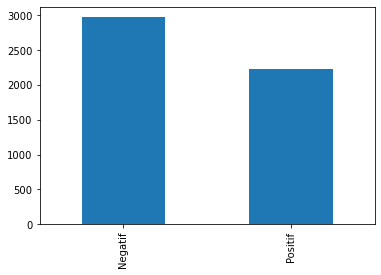

In [3]:
# Import Matplotlib Dan Seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

data_label.label.value_counts().plot(kind='bar')


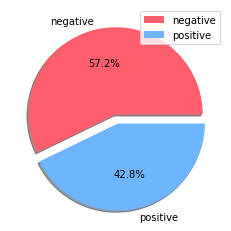

In [4]:
#Data to plot
# labels = ['negative','positive']
# colors = ("#FF968A","#6EB5FF")

labels = ['negative','positive']
colors = ("#FF5F6D","#6EB5FF")

explode = (0.01,0.1) #explode 1st slice

#plot
fig,ax = plt.subplots()
ax.pie(data_label.label.value_counts(), labels=labels, autopct='%.1f%%', explode=explode, shadow=True, colors=colors)
ax.legend(labels,loc='best')
ax.set_aspect('equal')
plt.tight_layout
plt.show()

In [5]:
#Import library untuk melakukan proses klasifikasi, validasi maupun evaluasi
from time import time #untuk proses perhitungan waktu komputasi
from sklearn.model_selection import GridSearchCV #untuk proses penyetelan parameter
from sklearn.pipeline import Pipeline #untuk menampung beberapa tahapan untuk proses klasifikasi yang dimana pembelajaran 
#mesin dapat berjalan otomatis secara bersama berurutan bergantian tetapi dalam tahap berbeda.
from sklearn.feature_extraction.text import TfidfVectorizer #untuk proses pembobotan kata dengan pemberian bobot nilai kepada 
#sebuah kata dengan melihat frekuensi relatif kemunculan kata dalam dokumen teks
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC #untuk proses klasifikasi dalam algoritma SVM
from sklearn.neighbors import KNeighborsClassifier #untuk proses klasifikasi dalam algoritma K-NN
from sklearn.model_selection import train_test_split #untuk proses pembagian data training maupun testing
from sklearn.model_selection import KFold #Untuk proses KFoldValidation
from sklearn.model_selection import cross_val_score #untuk proses validasi dengan nilai perulangan sesuai nilai K
from sklearn import metrics 
from sklearn.metrics import classification_report #untuk proses menampilkan evaluasi
from sklearn.metrics import accuracy_score #untuk proses menampilkan hasil akurasi dari proses model klasifikasi
from sklearn.metrics import precision_recall_curve #untuk proses menampilkan hasil presisi dan recall dari proses model klasifikasi
from sklearn.metrics import f1_score #untuk proses menampilkan hasil f1-score dari proses model klasifikasi


In [6]:
#mengubah  Sentimen Kedalam Bentuk Angka
# konversi sentimen yang berupa kata menjadi sebuah angka
#positif 1
#negatif 0
data_label['label'] = data_label.label.map(lambda x: int(1) if x =='Positif' else int(0) if x =='Negatif' else np.nan)
print(data_label['label'].value_counts())
data_label



0    2973
1    2225
Name: label, dtype: int64


,text,label
0,demi proses pendidikan yg ideal sya mendukung ...,1
1,sambut sekolah tatap muka sekolah di semarang ...,1
2,lihat hari ini puluhan sekolah di pemalang mul...,1
3,menko pmk muhadjir effendy meminta sekolah yan...,1
4,duh di petarukan pemalang sekolah tatap muka d...,0
...,...,...
5193,siswa sd sampe gunungkidul sekolah tatap muka,1
5194,perintah kota tangerang selatan izin siswa gia...,0
5195,timbang sekolah tatap muka hak asasi orang tua...,0
5196,ombudsman jakarta raya pemprov dki jawa barat ...,1


<AxesSubplot:>

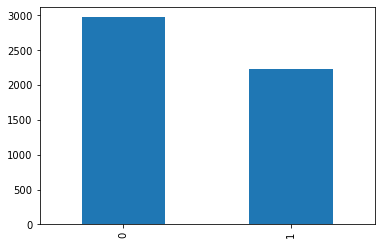

In [7]:
# Import Matplotlib Dan Seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

data_label.label.value_counts().plot(kind='bar')


In [8]:
df = data_label[data_label['label']== 0]
df.head()

,text,label
4,duh di petarukan pemalang sekolah tatap muka d...,0
6,pemerintah kabupaten pemkab klaten saat ini be...,0
9,pts luring covid sebenarnya saya bertanyatanya...,0
17,keren tu tetiba sekolah gua drop masuk tatap m...,0
26,bokep viral lagi guys setelah parakan muncul l...,0


In [12]:
#Proses untuk pembagian dataset training dan testing

#Membangun One-dimensional array dan N-dimensional array dengan nilai random. 
#Gunakan fungsi np.random.randint(batas atas, size=dimensi array)

#np.random.randint(low, high=None, size=None, dtype=int)
#Fungsi untuk melakukan pengambilan sampel secara acak di numpy
#Membuat variabel index yang berguna untuk menghilangkan index pada data
idx = np.random.randint(0,2000,2000)

#.loc = membaca baris berdasarkan index
reduce_data = data_label.loc[idx] 
"""
Membaca setiap baris data yang ada di dataframe data label berdasarkan hasil pengacakan pada variabel idx yang sudah melakukan 
pengambilan sampel secara acak, kemudian dari proses tersebut disimpan lagi di dalam dataframe reduce_data
"""
data_train,data_test=train_test_split(reduce_data,test_size = 0.5) 
"""
Membagi data dengan menggunakan fungsi train_test_split yang dimana parameter masukan berisi dataframe
reduce_data=data yang sudah dibaca perbarisnya, serta ukuran pembagian datanya, disini 0.2 artinya 
pembagian data menghasilkan data testing sebanyak 20% dan sisanya data training. Data tersebut akan 
disimpan ke dalam variabel data_train dan data_test yang dimana 
"""
#Menetapkan isi dari variabel train dan test yang termasuk isi dari data training dan testing dalam bentuk list
train = data_train[['text','label']].reset_index().drop('index',axis=1)
test = data_test[['text','label']].reset_index().drop('index',axis=1)
#Menggunakan fungsi drop () untuk mengambil semua data lainnya di index. Kemudian, dibagi datanya.

In [13]:
train.to_csv('D:/crawling/traincoba5.csv', header=None, index=False)
test.to_csv('D:/crawling/testcoba5.csv', header=None, index=False)


In [14]:
header_list = ["text","label"]
train = pd.read_csv('D:/crawling/traincoba5.csv',names=header_list)
test = pd.read_csv('D:/crawling/testcoba5.csv', names=header_list)

In [15]:
"""
Proses mendefinisikan atau seleksi kolom yang menjadi prediktor maupun output ke dalam variabel X dan y dalam set pelatihan
maupun pengujian yang dimana dari kedua variabel tersebut memiliki peran sebagai variabel independen dan dependen untuk proses
klasifikasi

Set pelatihan adalah bagian dari kumpulan data yang digunakan untuk melatih model. 
=>X_train adalah kumpulan data pelatihan. Variabel ini termasuk kedalam variabel independen.
=>y_train adalah kumpulan label untuk semua data di X_train. Termasuk variabel dependen yang perlu diprediksi oleh model, 
seperti termasuk label kategori terhadap variabel independen yang ada, oleh karna itu perlu menentukan variabel dependen 
saat melatih / menyesuaikan model.

Set pengujian adalah subset dari kumpulan data yang Anda gunakan untuk menguji model Anda setelah model melalui pemeriksaan
awal oleh set validasi.
=>X_test adalah kumpulan data pengujian. Variabel ini termasuk kedalam variabel independen. 
Variabel independen dari data yang tidak akan digunakan dalam tahap pelatihan dan akan digunakan untuk membuat prediksi 
guna menguji keakuratan model
=>y_test adalah kumpulan label untuk semua data di X_test. Label ini akan digunakan untuk menguji akurasi antara kategori 
aktual dan prediksi

"""
X_train = train.text #data file train dengan kolom text
y_train = train.label #data file train dengan kolom label
X_test = test.text #data file test dengan kolom text
y_test = test.label #data file text dengan kolom label

In [16]:
"""
Tentukan pipeline yang berisi metode mana yang digunakan yang nantinya akan diproses untuk menjadi model terbaik dengan
menggabungkan ekstraktor fitur teks dengan pengklasifikasi sederhana.

Disini pipeline berisi estimator dari beberapa metode algoritma yang digunakan untuk menampung semua fitur ekstraksi maupun 
fitur dari metode algoritma yang akan di ujikan satu sama lain pada proses penyetelan dengan pendekatan GridSearchCV.
"""
text_clf_mnb = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', MultinomialNB())])

"""
Proses penyetelan menggunakan hyperparameter utama pada setiap metode algoritma. Banyak parameter yang dicoba akan memberikan
daya penjelajahan yang lebih baik tetapi akan meningkatkan waktu pemrosesan dengan cara kombinatorial.

Pada metode algoritma Naive Bayes varian BernoulliNB ini menggunakan pencarian nilai terbaik dari hyperparameter binarize
dan alpha, kemudian untuk ekstraksi fitur kata menggunakan dari TFIDFVectorizer dengan pemilihan nilai hyperparameter
ngram_range
"""

"""
Pipeline ini dilakukan dengan cara memungkinkan pengaturan parameter dari berbagai langkah menggunakan nama mereka dan nama 
parameter yang dipisahkan dengan penulisan __ seperti pada contoh di bawah ini. Estimator langkah dapat diganti seluruhnya 
dengan mengatur parameter dengan namanya ke estimator lain.
"""

tuned_parameters_mnb = {
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
#    'clf__binarize' : [0.0,0,5,0.6,1.0,1.5],
    'clf__alpha': [1, 1e-1, 1e-2, 1e-3, 1e-4]
}

In [17]:
t = time()

"""
Tahapan proses mencari nilai dari hyperparameter setiap algoritma menggunakan GridSearchCV untuk mendapatkan kombinasi parameter
terbaik dengan gabungan fitur lainnya selain pengklasifikasian
"""

#Melakukan validasi sebanyak 10 kali untuk masing-masing nilai pada parameter alpha
cv = KFold(n_splits=10, shuffle=True, random_state=1)

#Membuat objek clf_mnb sebagai fungsi dari proses GridsearchCV
clf_mnb = GridSearchCV(text_clf_mnb, tuned_parameters_mnb, scoring = 'accuracy', cv=cv, n_jobs = -1,return_train_score=True)

#Sesuaikan dengan model/Masukkan ke model/Fit the model
#Fitting model dimana model belajar untuk mencari hubungan antara X_train dan y_train 
clf_mnb.fit(X_train,y_train)

print("Hasil Score data test : ", clf_mnb.score(X_train,y_train))
print("Hasil Score data test : ", clf_mnb.score(X_test,y_test))

training_time = time() - t
print("Waktu Komputasi dari proses hyperparameter tuning di dalam Grid: %0.3fs" % training_time)

Hasil Score data test :  0.981
Hasil Score data test :  0.79
Waktu Komputasi dari proses hyperparameter tuning di dalam Grid: 5.950s


In [18]:
"""
Proses menampilkan setiap kombinasi nilai hyperparameter dari proses pengujian sebelumnya, hal ini memudahkan untuk melihat 
setiap alur dari pencocokan berlangsung yang dimana hasil akhir berupa nilai terbaik dari kombinasi antar beberapa estimator
(seperti pemilihan fitur) yang diujikan pada 1 set penyetelan dalam sistem pipeline.
"""

print("Best parameters set found on development set:")
print(clf_mnb.best_params_)
print("Best Score:", clf_mnb.best_score_)
print('\n')

means = clf_mnb.cv_results_['mean_test_score'] #nilai rata rata akurasi
stds = clf_mnb.cv_results_['std_test_score'] #nilai standar deviasi
params = clf_mnb.cv_results_['params'] #nilai-nilai param yang sudah didefinisikan ke opsi pengujian sebelumnya (text_clf_bnb,
#tuned_parameters_bnb yang dimana ditampilkan dalam bentuk berupa pencocokan secara satu-persatu

#Proses perulangan untuk menampilkan nilai-nilai tersebut
for mean, stdev, param in zip(means,stds,params):
    print("Mean: %f Stdev:(%f) with: %r" % (mean,stdev,param))

Best parameters set found on development set:
{'clf__alpha': 0.1, 'tfidf__ngram_range': (1, 2)}
Best Score: 0.788


Mean: 0.724000 Stdev:(0.039294) with: {'clf__alpha': 1, 'tfidf__ngram_range': (1, 1)}
Mean: 0.744000 Stdev:(0.037202) with: {'clf__alpha': 1, 'tfidf__ngram_range': (1, 2)}
Mean: 0.770000 Stdev:(0.030659) with: {'clf__alpha': 1, 'tfidf__ngram_range': (1, 3)}
Mean: 0.766000 Stdev:(0.031369) with: {'clf__alpha': 0.1, 'tfidf__ngram_range': (1, 1)}
Mean: 0.788000 Stdev:(0.025219) with: {'clf__alpha': 0.1, 'tfidf__ngram_range': (1, 2)}
Mean: 0.781000 Stdev:(0.028089) with: {'clf__alpha': 0.1, 'tfidf__ngram_range': (1, 3)}
Mean: 0.765000 Stdev:(0.021564) with: {'clf__alpha': 0.01, 'tfidf__ngram_range': (1, 1)}
Mean: 0.786000 Stdev:(0.014967) with: {'clf__alpha': 0.01, 'tfidf__ngram_range': (1, 2)}
Mean: 0.787000 Stdev:(0.023259) with: {'clf__alpha': 0.01, 'tfidf__ngram_range': (1, 3)}
Mean: 0.771000 Stdev:(0.028443) with: {'clf__alpha': 0.001, 'tfidf__ngram_range': (1, 1)}
Mean:

In [19]:
"""
Meringkas hasil dari GrisSearchCV
Menampilkan hasil setiap pencocokan parameter dari proses GridSearchCV beserta nilai pelatihan dan pengujian dari setiap 
kombinasi dalam bentuk DataFrame yang isinya berupa pasangan kombinasi tiap hyperparameter yang diujikan.
"""
result_mnb = pd.DataFrame(clf_mnb.cv_results_['params'])
result_mnb['test_score'] = clf_mnb.cv_results_['mean_test_score']
result_mnb['train_score'] = clf_mnb.cv_results_['mean_train_score']
result_mnb

,clf__alpha,tfidf__ngram_range,test_score,train_score
0,1.0000,"(1, 1)",0.724,0.887556
1,1.0000,"(1, 2)",0.744,0.954444
2,1.0000,"(1, 3)",0.770,0.973333
3,0.1000,"(1, 1)",0.766,0.941000
4,0.1000,"(1, 2)",0.788,0.981778
5,0.1000,"(1, 3)",0.781,0.987333
6,0.0100,"(1, 1)",0.765,0.950333
7,0.0100,"(1, 2)",0.786,0.985000
8,0.0100,"(1, 3)",0.787,0.990444
9,0.0010,"(1, 1)",0.771,0.952000


In [20]:

import joblib
final_model = clf_mnb.best_estimator_
joblib.dump(final_model, "clf_mnb.pkl")

['clf_mnb.pkl']

In [21]:
t = time()

#Proses melatih model
#Mengaktifkan/memanggil/membuat fungsi klasifikasi Bernoulli Naive Bayes dengan pemilihan fitur yang akan digunakan
#Dalam proses ini hasil nilai setiap parameter didapat dari proses sebelumnya setelah melakukan proses pencocokan atau
#kombinasi, yaitu proses hyperparameter tuning. 
mnb = Pipeline([('tfidf', TfidfVectorizer(ngram_range=(1,2))),
                ('clf', MultinomialNB(alpha=0.1))])

"""
Sesuaikan dengan model/Masukkan ke model/Fit the model. Memasukkan data training pada fungsi klasifikasi NB.
Masukan dalam bentuk parameter yang berisi X_train (kumpulan data pelatihan yang bersifat independen), y_train (kumpulan label 
untuk semua data di X_train yang bersifat dependen yang perlu diprediksi oleh model)

Cocokkan semua transformasi satu demi satu dan transformasikan data, kemudian set data yang ditransformasi menggunakan 
estimator akhir.
"""
# Fitting model dimana model belajar untuk mencari hubungan antara X_train dan y_train 
mnb.fit(X_train,y_train)

#Untuk set waktu selama proses training sedang berjalan
training_time = time() - t
print("train time: %0.3fs" % training_time)

print("================================")
print("Hasil Score data train : ", mnb.score(X_train,y_train))
print("Hasil Score data test : ", mnb.score(X_test,y_test))

train time: 0.039s
Hasil Score data train :  0.981
Hasil Score data test :  0.79


In [22]:
"""
Set validasi adalah subset dari kumpulan data (terpisah dari set pelatihan) yang Anda gunakan untuk menyesuaikan 
hyperparameter.

Proses pelatihan model/Training the model dengan menggunakan nilai validasi sebanyak 10 pembagian data yang bekerja secara acak
dengan membagi 10 bagian secara rata dengan jumlah data yang sama. Selanjutnya dilakukan proses silang, dimana data training 
dijadikan data testing dan sebaliknya, proses ini diulang sebanyak 10 kali pada training set yang berbeda. 

Rata-rata perkiraan nilai dari 10-fold cross validation digunakan untuk menghasilkan perkiraan keseluruhan. 

"""

"""
Setelah tahapan melatih model, langkah selanjutnya adalah hasil pelatihan model tersebut di evaluasi untuk melihat seberapa 
bagus kinerja dari model tersebut dengan memvalidasi terlebih dahulu kemudian dilakukan proses testing menggunakan data testing 
yang sudah disediakan sebelumnya.
"""
#Melakukan validasi sebanyak 10 kali
cv = KFold(n_splits=10, shuffle=True, random_state=1)
accuracy = cross_val_score(mnb, X_train, y_train, scoring = 'accuracy', cv=cv)
print('cross validation score', accuracy)

#Menghitung rata-rata nilai validasi silang
print('Average cross-validation Mean Score : {:.4f}'.format(accuracy.mean()))

#Menghitung rata-rata standar deviasi nilai validasi silang
print('Average cross-validation Std Score : {:.4f}'.format(accuracy.std()))

cross validation score [0.83 0.8  0.78 0.75 0.77 0.77 0.8  0.78 0.83 0.77]
Average cross-validation Mean Score : 0.7880
Average cross-validation Std Score : 0.0252


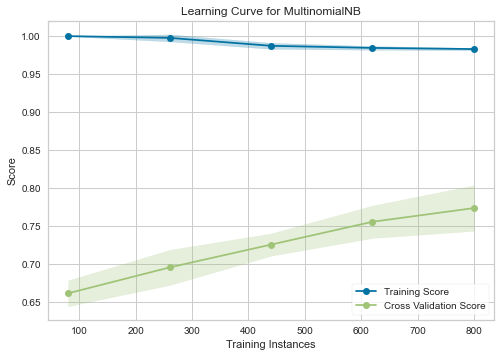

<AxesSubplot:title={'center':'Learning Curve for MultinomialNB'}, xlabel='Training Instances', ylabel='Score'>

In [23]:
from yellowbrick.model_selection import LearningCurve

#Buat contoh model pengelompokan dan visualizer
visualizer = LearningCurve(mnb, scoring="accuracy")

visualizer.fit(X_train, y_train) #Masukkan data ke visualisator
visualizer.show() #Tampilkan gambar

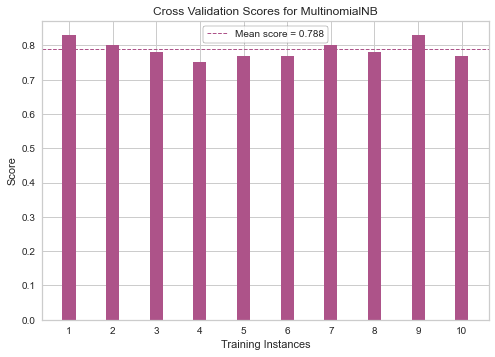

<AxesSubplot:title={'center':'Cross Validation Scores for MultinomialNB'}, xlabel='Training Instances', ylabel='Score'>

In [24]:
#Visualisasi untuk nilai setiap literasi dalam proses Validasi Silang di algoritma BNB
#!pip install yellowbrick
from yellowbrick.model_selection import CVScores
import warnings

warnings.filterwarnings('ignore')

cv = KFold(n_splits=10, shuffle=True, random_state=1)
visualizer = CVScores(mnb, cv=cv, scoring='accuracy',color="#ad5389")

visualizer.fit(X_train,y_train)
visualizer.show()

In [25]:

"""
Perhitungan nilai evaluasi dihasilkan setelah proses validasi, yang dimana dari proses pelatihan, divalidasi dengan data 
testing yang sudah disiapkan kemudian menghasilkan nilai evaluasi seperti classification report atau metrik performa akurasi, 
presisi, recall, f1-score
"""

#Waktu komputasi untuk testing data
t = time()
test_time = time() - t

print("test time:  %0.3fs" % test_time)
print("========================")

#Menentukan hasil prediksi dari X_test
#get predictions from model
y_pred_mnb = mnb.predict(X_test)

"""
Setelah proses klasifikasi selesai, diperlukan adanya evaluasi untuk menentukan kualitas metode yang telah berhasil dibuat pada 
tahap sebelumnya. Pada tahap evaluasi ini metrik performa accuracy, precision, recall, dan F1-Score akan digunakan untuk menguji 
kinerja proses klasifikasi yang ditampilkan melalui function classification_report dimana berisi parameter masukan yaitu y_test
(kumpulan label dari semua data di X_test;data pengujian) dan y_pred_bnb (proses prediksi kumpulan data pengujian (X_test) yang
bersifat variabel independen)
"""
# Classify and report the results
print(classification_report(y_test, y_pred_mnb))

print('Accuracy Score - MultinomialNB:', metrics.accuracy_score(y_test, y_pred_mnb))

test time:  0.000s
              precision    recall  f1-score   support

           0       0.74      0.74      0.74       401
           1       0.82      0.83      0.83       599

    accuracy                           0.79      1000
   macro avg       0.78      0.78      0.78      1000
weighted avg       0.79      0.79      0.79      1000

Accuracy Score - MultinomialNB: 0.79


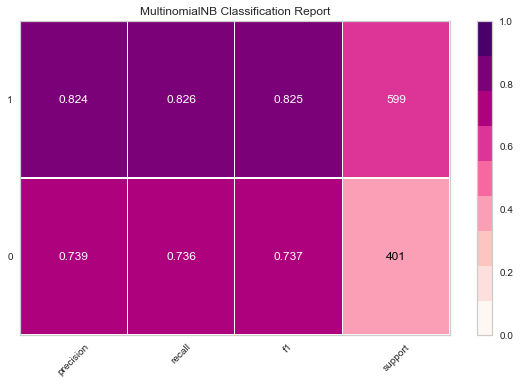

<AxesSubplot:title={'center':'MultinomialNB Classification Report'}>

In [26]:
#Library untuk menampilkan laporan evaluasi model klasifikasi dalam bentuk visualisasi agar lebih mudah dipahami
from yellowbrick.classifier import ClassificationReport

#Buat contoh model pengelompokan dan visualizer
visualizer = ClassificationReport(mnb,support=True,cmap='RdPu')

visualizer.fit(X_train, y_train)  #Sesuaikan visualisator dan modelnya
visualizer.score(X_test, y_test)  #Evaluasi model pada data pengujian
visualizer.show()


,negatif,positif,accuracy,macro avg,weighted avg
precision,0.739348,0.823627,0.79,0.781488,0.789831
recall,0.735661,0.826377,0.79,0.781019,0.790000
f1-score,0.737500,0.825000,0.79,0.781250,0.789913
support,401.000000,599.000000,0.79,1000.000000,1000.000000


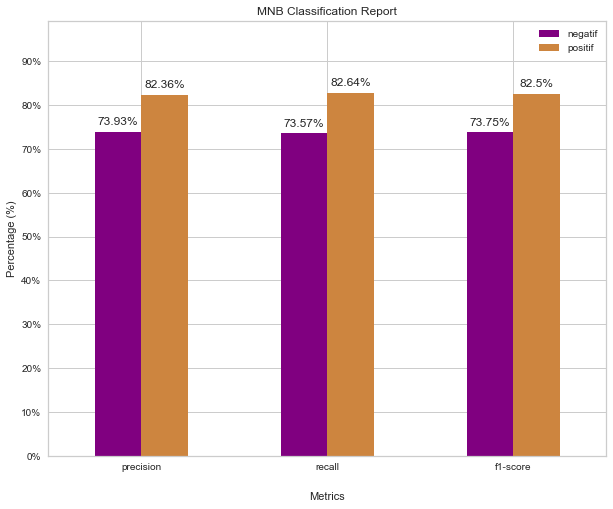

In [27]:
#Import library untuk visualisasi gambar
import matplotlib.pyplot as plt

"""
Variabel ini digunakan untuk menampung nama label yang digunakan dalam kolom untuk confusion matrix dan berfungsi sebagai tanda
label di bagian visualisasi dari classification report
"""
target_labels = ['negatif', 'positif']

#store the classification report as a dictionary
cr_dict = classification_report(y_test, y_pred_mnb, target_names=target_labels, output_dict=True)

#convert the classification report dictionary into a data frame
cr_data = pd.DataFrame(cr_dict)
display(cr_data)

#plot the classification report scores
ax=cr_data.iloc[:-1, :2].plot.bar(figsize=(10,8),color=['#800080','#CD853F'])
plt.title("MNB Classification Report")
plt.xlabel('Metrics', labelpad=20)

#fix the x-ticktek mark rotation
plt.xticks(rotation=0)

#create custom y-tick marks and labels for percentage representation
#create an array of even tick marks from 0 to 1
percent_ticks = np.linspace(0,1,11, endpoint=True)

#create a list of strings representing the percentage at each tick
percent_labels = [f'{int(t*100)}%' for t in percent_ticks]
plt.yticks(ticks=percent_ticks,labels=percent_labels)
plt.ylabel('Percentage (%)')
plt.margins(0.2,0.2)

for p in ax.patches:
    ax.annotate(
        "{}%".format(str(np.round(p.get_height()*100, 2))),
        xy=(p.get_x()*1+p.get_width()/2, p.get_height()*1.02),
        ha='center',
    )

In [28]:
from sklearn.metrics import confusion_matrix
cm_mnb = confusion_matrix(y_test, y_pred_mnb)
print(cm_mnb)

[[295 106]
 [104 495]]


In [29]:

"""

"""
#Fungsi untuk menghitung metrik performa sensitivity dan specificity dalam proses klasifikasi
def calculate_sensitivity_specificity(y_test, y_pred_test):
    # Note: More parameters are defined than necessary. 
    # This would allow return of other measures other than sensitivity and specificity
    
    # Get true/false for whether a breach actually occurred
    actual_pos = y_test == 1
    actual_neg = y_test == 0
    
    # Get true and false test (true test match actual, false tests differ from actual)
    true_pos = (y_pred_mnb == 1) & (actual_pos)
    false_pos = (y_pred_mnb == 1) & (actual_neg)
    true_neg = (y_pred_mnb == 0) & (actual_neg)
    false_neg = (y_pred_mnb == 0) & (actual_pos)
    
    # Calculate accuracy
    accuracy_mnb = np.mean(y_pred_test == y_test)
    
    # Calculate sensitivity and specificity
    sensitivity_mnb = np.sum(true_pos) / np.sum(actual_pos)
    specificity_mnb = np.sum(true_neg) / np.sum(actual_neg)
    
    return sensitivity_mnb, specificity_mnb, accuracy_mnb

In [30]:
#Proses perhitungan dengan memanggil fungsi sebelumnya
sensitivity_mnb, specificity_mnb, accuracy_mnb = calculate_sensitivity_specificity(y_test, y_pred_mnb)
print ('Sensitivity:', sensitivity_mnb)
print ('Specificity:', specificity_mnb)
print ('Accuracy:', accuracy_mnb)

Sensitivity: 0.8263772954924875
Specificity: 0.7356608478802993
Accuracy: 0.79


# SVM 

In [31]:
"""
Tentukan pipeline yang berisi metode mana yang digunakan yang nantinya akan diproses untuk menjadi model terbaik dengan
menggabungkan ekstraktor fitur teks dengan pengklasifikasi sederhana.
Disini pipeline berisi estimator dari beberapa metode algoritma yang digunakan untuk menampung semua fitur ekstraksi maupun 
fitur dari metode algoritma yang akan di ujikan satu sama lain pada proses penyetelan dengan pendekatan GridSearchCV.
"""
text_clf_svm = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', SVC())])

"""
Proses penyetelan menggunakan hyperparameter utama pada setiap metode algoritma. Banyak parameter yang dicoba akan memberikan
daya penjelajahan yang lebih baik tetapi akan meningkatkan waktu pemrosesan dengan cara kombinatorial.

Pada metode algoritma Support Vector Machine ini menggunakan pencarian nilai terbaik dari hyperparameter C dan kernel, 
kemudian untuk ekstraksi fitur kata menggunakan dari TFIDFVectorizer dengan pemilihan nilai hyperparameter ngram_range
"""

"""
Pipeline ini dilakukan dengan cara memungkinkan pengaturan parameter dari berbagai langkah menggunakan nama mereka dan nama 
parameter yang dipisahkan dengan penulisan __ seperti pada contoh di bawah ini. Estimator langkah dapat diganti seluruhnya 
dengan mengatur parameter dengan namanya ke estimator lain.
"""

tuned_parameters_svm = {
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'clf__C': [0.5,1.0,1.5,2.0,2.5,3.0],
    'clf__kernel' : ['linear','rbf','sigmoid','poly'],
    'clf__class_weight' : ['balanced']
}

In [32]:
t = time()

"""
Tahapan proses mencari nilai dari hyperparameter setiap algoritma menggunakan GridSearchCV untuk mendapatkan kombinasi parameter
terbaik dengan gabungan fitur lainnya selain pengklasifikasian
"""
#Melakukan validasi sebanyak 10 kali
cv = KFold(n_splits=10, shuffle=True, random_state=1)

#Membuat objek clf_svm sebagai fungsi dari proses GridsearchCV
clf_svm = GridSearchCV(text_clf_svm, tuned_parameters_svm, scoring = 'accuracy',cv=cv, n_jobs = -1, return_train_score=True)

#Sesuaikan dengan model/Masukkan ke model/Fit the model
#Fitting model dimana model belajar untuk mencari hubungan antara X_train dan y_train
clf_svm.fit(X_train,y_train)

print("Hasil Score data test : ", clf_svm.score(X_train,y_train))
print("Hasil Score data test : ", clf_svm.score(X_test,y_test))

training_time = time() - t
print("Waktu Komputasi dari proses hyperparameter tuning di dalam Grid: %0.3fs" % training_time)

Hasil Score data test :  0.992
Hasil Score data test :  0.806
Waktu Komputasi dari proses hyperparameter tuning di dalam Grid: 53.702s


# Proses hasil setiap kombinasi nilai hyperparameter dari proses pengujian sebelumnya

In [33]:
"""
Proses menampilkan setiap kombinasi nilai hyperparameter dari proses pengujian sebelumnya, hal ini memudahkan untuk melihat 
setiap alur dari pencocokan berlangsung yang dimana hasil akhir berupa nilai terbaik dari kombinasi antar beberapa estimator
(seperti pemilihan fitur) yang diujikan pada 1 set penyetelan dalam sistem pipeline.
"""

print("Best parameters set found on development set:")
print(clf_svm.best_params_)
print("Best Score:", clf_svm.best_score_)
print('\n')

means = clf_svm.cv_results_['mean_test_score'] #nilai rata rata akurasi
stds = clf_svm.cv_results_['std_test_score'] #nilai standar deviasi
params = clf_svm.cv_results_['params'] #nilai-nilai param yang sudah didefinisikan ke opsi pengujian sebelumnya (text_clf_svm,
#tuned_parameters_svm yang dimana ditampilkan dalam bentuk berupa pencocokan secara satu-persatu

#Proses perulangan untuk menampilkan nilai-nilai tersebut
for mean, stdev, param in zip(means,stds,params):
    print("Mean: %f Stdev:(%f) with: %r" % (mean,stdev,param))

Best parameters set found on development set:
{'clf__C': 1.0, 'clf__class_weight': 'balanced', 'clf__kernel': 'rbf', 'tfidf__ngram_range': (1, 2)}
Best Score: 0.806


Mean: 0.754000 Stdev:(0.038000) with: {'clf__C': 0.5, 'clf__class_weight': 'balanced', 'clf__kernel': 'linear', 'tfidf__ngram_range': (1, 1)}
Mean: 0.770000 Stdev:(0.029665) with: {'clf__C': 0.5, 'clf__class_weight': 'balanced', 'clf__kernel': 'linear', 'tfidf__ngram_range': (1, 2)}
Mean: 0.778000 Stdev:(0.036551) with: {'clf__C': 0.5, 'clf__class_weight': 'balanced', 'clf__kernel': 'linear', 'tfidf__ngram_range': (1, 3)}
Mean: 0.781000 Stdev:(0.035341) with: {'clf__C': 0.5, 'clf__class_weight': 'balanced', 'clf__kernel': 'rbf', 'tfidf__ngram_range': (1, 1)}
Mean: 0.796000 Stdev:(0.038000) with: {'clf__C': 0.5, 'clf__class_weight': 'balanced', 'clf__kernel': 'rbf', 'tfidf__ngram_range': (1, 2)}
Mean: 0.793000 Stdev:(0.027946) with: {'clf__C': 0.5, 'clf__class_weight': 'balanced', 'clf__kernel': 'rbf', 'tfidf__ngram_range'

In [34]:
"""
Meringkas hasil dari GrisSearchCV
Menampilkan hasil setiap pencocokan parameter dari proses GridSearchCV beserta nilai pelatihan dan pengujian dari setiap 
kombinasi dalam bentuk DataFrame yang isinya berupa pasangan kombinasi tiap hyperparameter yang diujikan.
"""

result_svm = pd.DataFrame(clf_svm.cv_results_['params'])
result_svm['test_score'] = clf_svm.cv_results_['mean_test_score']
result_svm['train_score'] = clf_svm.cv_results_['mean_train_score']
result_svm

,clf__C,clf__class_weight,clf__kernel,tfidf__ngram_range,test_score,train_score
0,0.5,balanced,linear,"(1, 1)",0.754,0.873444
1,0.5,balanced,linear,"(1, 2)",0.770,0.928556
2,0.5,balanced,linear,"(1, 3)",0.778,0.950444
3,0.5,balanced,rbf,"(1, 1)",0.781,0.943000
4,0.5,balanced,rbf,"(1, 2)",0.796,0.975556
...,...,...,...,...,...,...
67,3.0,balanced,sigmoid,"(1, 2)",0.785,0.983444
68,3.0,balanced,sigmoid,"(1, 3)",0.790,0.990889
69,3.0,balanced,poly,"(1, 1)",0.782,1.000000
70,3.0,balanced,poly,"(1, 2)",0.774,1.000000


# Proses Pemodelan SVM

In [35]:
t = time()

#Proses melatih model
#Mengaktifkan/memanggil/membuat fungsi klasifikasi Support Vector Machine dengan pemilihan fitur yang akan digunakan
#Dalam proses ini hasil nilai setiap parameter didapat dari proses sebelumnya setelah melakukan proses pencocokan atau
#kombinasi, yaitu proses hyperparameter tuning.
#Membuat objek svm sebagai fungsi dari metode Support Vector Machine yang di dalamnya menggunakan parameter yang diperoleh dari hasil grid 
svm = Pipeline([('tfidf', TfidfVectorizer(ngram_range=(1,3))),
                ('clf', SVC(C=1.5, class_weight='balanced', kernel='linear'))
               ])

"""
Sesuaikan dengan model/Masukkan ke model/Fit the model. Memasukkan data training pada fungsi klasifikasi BNB.
Masukan dalam bentuk parameter yang berisi X_train (kumpulan data pelatihan yang bersifat independen), y_train (kumpulan label 
untuk semua data di X_train yang bersifat dependen yang perlu diprediksi oleh model)

Cocokkan semua transformasi satu demi satu dan transformasikan data, kemudian set data yang ditransformasi menggunakan 
estimator akhir.
"""
#Fitting model dimana model belajar untuk mencari hubungan antara X_train dan y_train 
svm.fit(X_train,y_train)

#Untuk set waktu selama proses training sedang berjalan
training_time = time() - t

print("train time: %0.3fs" % training_time)
print("================================")
print("Hasil Score data train : ", svm.score(X_train,y_train))
print("Hasil Score data test : ", svm.score(X_test,y_test))

train time: 0.273s
Hasil Score data train :  0.992
Hasil Score data test :  0.798


In [36]:

"""
Set validasi adalah subset dari kumpulan data (terpisah dari set pelatihan) yang digunakan untuk menyesuaikan hyperparameter.
Hal ini digunakan untuk mengetahui seberapa bagus model yang dibangun pada proses sebelumnya dengan menggunakan nilai 
validasi sebanyak 10 pembagian data yang bekerja secara acak dengan membagi 10 bagian secara rata dengan jumlah data yang sama. 
Selanjutnya dilakukan proses silang, dimana data training dijadikan data testing dan sebaliknya, proses ini diulang sebanyak 10
kali pada training set yang berbeda. 

Rata-rata perkiraan nilai dari 10-fold cross validation digunakan untuk menghasilkan perkiraan keseluruhan. 

"""

"""opsi penjelasan
Setelah tahapan melatih model, langkah selanjutnya adalah hasil pelatihan model tersebut di evaluasi untuk melihat seberapa 
bagus kinerja dari model tersebut dengan memvalidasi terlebih dahulu kemudian dilakukan proses testing menggunakan data testing 
yang sudah disediakan sebelumnya.
"""
#Melakukan validasi sebanyak 10 kali
cv = KFold(n_splits=10, shuffle=True, random_state=1)
accuracy = cross_val_score(svm, X_train, y_train, scoring = 'accuracy', cv = cv)
print('cross validation score', accuracy)

#compute average cross-validation score
print('Average cross-validation Mean Score : {:.4f}'.format(accuracy.mean()))

#compute average cross-validation score
print('Average cross-validation Std Score : {:.4f}'.format(accuracy.std()))

cross validation score [0.84 0.82 0.82 0.73 0.77 0.8  0.84 0.77 0.82 0.75]
Average cross-validation Mean Score : 0.7960
Average cross-validation Std Score : 0.0367


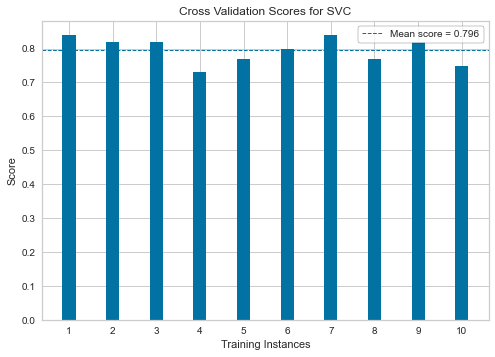

<AxesSubplot:title={'center':'Cross Validation Scores for SVC'}, xlabel='Training Instances', ylabel='Score'>

In [37]:
#Visualisasi untuk nilai setiap literasi dalam proses Validasi Silang di algoritma SVM
#!pip install yellowbrick

#Import library untuk visualisasi nilai validasi silang
from yellowbrick.model_selection import CVScores

"""
Peringatan disediakan untuk memperingatkan pengembang tentang situasi yang belum tentu merupakan pengecualian. Biasanya, 
peringatan terjadi ketika ada beberapa elemen pemrograman tertentu yang sudah usang, seperti kata kunci, fungsi atau kelas, 
dll. Peringatan dalam program berbeda dari kesalahan. Program Python segera berakhir jika terjadi kesalahan. Sebaliknya,
peringatan tidaklah penting. Ini menunjukkan beberapa pesan, tetapi program berjalan.
"""
import warnings 
#Warning Class: Ini adalah kelas super dari semua kelas kategori peringatan dan subkelas dari kelas Exception.
#ImportWarning Class: Kelas dasar untuk peringatan yang disebabkan selama proses impor modul.

warnings.filterwarnings('ignore')
#"ignore" merupakan action yang artinya jangan pernah menampilkan peringatan yang cocok
#filterwarnings(action, message=”, category=Warning, module=”, lineno=0, append=False): This function adds an entry into the 
#specifications of the warnings filter.

cv = KFold(n_splits=10, shuffle=True, random_state=1)
visualizer = CVScores(svm, cv=cv, scoring='accuracy') #Fungsi ini menambahkan entri ke dalam spesifikasi filter peringatan.
visualizer.fit(X_train,y_train)
visualizer.show()

In [38]:

"""
Perhitungan nilai evaluasi dihasilkan setelah proses validasi, yang dimana dari proses pelatihan, divalidasi dengan data 
testing yang sudah disiapkan kemudian menghasilkan nilai evaluasi seperti classification report atau metrik performa akurasi, 
presisi, recall, f1-score
"""

#Waktu komputasi untuk testing data
t = time()
test_time = time() - t

print("test time:  %0.3fs" % test_time)
print("========================")

#Menentukan hasil prediksi dari X_test
#get predictions from model 
#Selanjutnya melakukan pengujian mengenai keakuratan model SVM terhadap data yang ada, prosesnya dilakukan dengan memprediksi
#data setelah proses training yang diprediksi oleh model
y_pred_svm = svm.predict(X_test)

"""
Setelah proses klasifikasi selesai, diperlukan adanya evaluasi untuk menentukan kualitas metode yang telah berhasil dibuat pada 
tahap sebelumnya. Pada tahap evaluasi ini metrik performa accuracy, precision, recall, dan F1-Score akan digunakan untuk menguji 
kinerja proses klasifikasi yang ditampilkan melalui function classification_report dimana berisi parameter masukan yaitu y_test
(kumpulan label dari semua data di X_test;data pengujian) dan y_pred_bnb (proses prediksi kumpulan data pengujian (X_test) yang
bersifat variabel independen)
"""
# Classify and report the results
print(classification_report(y_test, y_pred_svm))
print('\n')

#print('BEST SVM MODEL')
print('Accuracy Score - SVM:', metrics.accuracy_score(y_test, y_pred_svm))

test time:  0.000s
              precision    recall  f1-score   support

           0       0.74      0.77      0.75       401
           1       0.84      0.82      0.83       599

    accuracy                           0.80      1000
   macro avg       0.79      0.79      0.79      1000
weighted avg       0.80      0.80      0.80      1000



Accuracy Score - SVM: 0.798


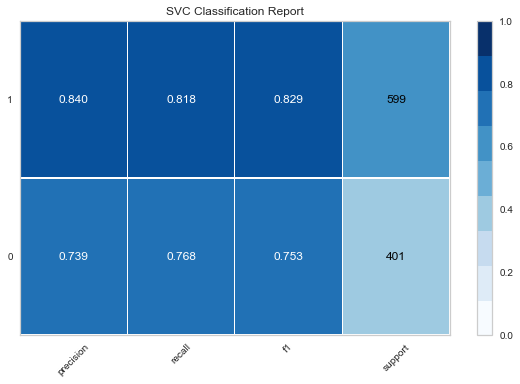

<AxesSubplot:title={'center':'SVC Classification Report'}>

In [39]:
#Library untuk menampilkan laporan evaluasi model klasifikasi dalam bentuk visualisasi agar lebih mudah dipahami
#from yellowbrick.classifier import ClassificationReport

#Buat contoh model pengelompokan dan visualizer
visualizer = ClassificationReport(svm,support=True,cmap='Blues')

visualizer.fit(X_train, y_train)  #Sesuaikan visualisator dan modelnya
visualizer.score(X_test, y_test)  #Evaluasi model pada data pengujian
visualizer.show()

,negatif,positif,accuracy,macro avg,weighted avg
precision,0.738609,0.840480,0.798,0.789545,0.799630
recall,0.768080,0.818030,0.798,0.793055,0.798000
f1-score,0.753056,0.829103,0.798,0.791080,0.798608
support,401.000000,599.000000,0.798,1000.000000,1000.000000


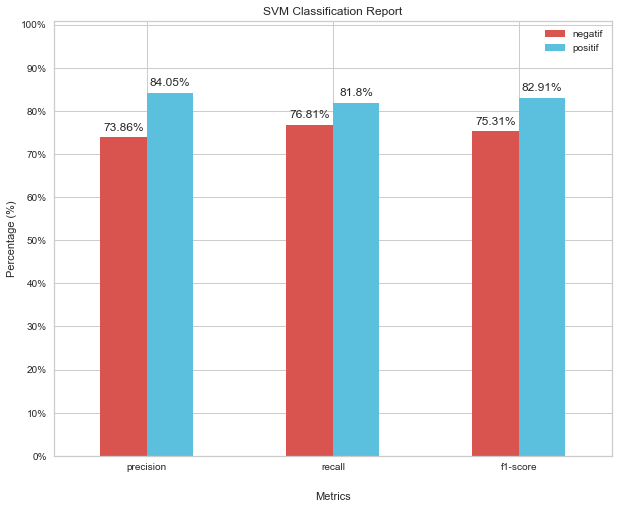

In [40]:
import matplotlib.pyplot as plt #Import library untuk visualisasi gambar

"""
Variabel ini digunakan untuk menampung nama label yang digunakan dalam kolom untuk confusion matrix dan berfungsi sebagai tanda
label di bagian visualisasi dari classification report, membuat label yang akan digunakan dan kolom untuk confusion matrix di
bagian hilir
"""
#create labels to be used and columns for a confusion matrix downstream
target_labels = ['negatif', 'positif']

#store the classification report as a dictionary
cr_dict = classification_report(y_test, y_pred_svm, target_names=target_labels, output_dict=True)

#convert the classification report dictionary into a data frame
cr_data = pd.DataFrame(cr_dict)
display(cr_data)

#plot the classification report scores
ax = cr_data.iloc[:-1, :2].plot.bar(figsize=(10,8),color=['#d9534f','#5bc0de'])
plt.title("SVM Classification Report")
plt.xlabel('Metrics', labelpad=20)

#fix the x-tick mark rotation
plt.xticks(rotation=0)

#create custom y-tick marks and labels for percentage representation
#create an array of even tick marks from 0 to 1
percent_ticks = np.linspace(0,1,11, endpoint=True)

#create a list of strings representing the percentage at each tick
percent_labels = [f'{int(t*100)}%' for t in percent_ticks]
plt.yticks(ticks=percent_ticks,labels=percent_labels)
plt.ylabel('Percentage (%)')
plt.margins(0.2,0.2)

#Perulangan untuk menampilkan nilai dari hasil parameter pengujian di setiap visualisasi yang ditampilkan
for p in ax.patches:
    ax.annotate(
        "{}%".format(str(np.round(p.get_height()*100, 2))),
        xy=(p.get_x()*1+p.get_width()/2, p.get_height()*1.02),
        ha='center',
    )

In [41]:
from sklearn.metrics import confusion_matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
print(cm_svm)

[[308  93]
 [109 490]]


In [42]:
"""
Pengukuran Sensitivitas dan Specificity digunakan untuk memplot kurva ROC. Dan, Area under ROC curve (AUC) digunakan untuk 
menentukan performansi model. Berikut ini adalah kurva ROC yang berbeda dan nilai AOC terkait.
"""
#Fungsi untuk menghitung metrik performa sensitivity dan specificity dalam proses klasifikasi
def calculate_sensitivity_specificity(y_test, y_pred_test):
    # Note: More parameters are defined than necessary. 
    # This would allow return of other measures other than sensitivity and specificity
    
    # Get true/false for whether a breach actually occurred
    actual_pos = y_test == 1
    actual_neg = y_test == 0
    
    # Get true and false test (true test match actual, false tests differ from actual)
    true_pos = (y_pred_svm == 1) & (actual_pos)
    false_pos = (y_pred_svm == 1) & (actual_neg)
    true_neg = (y_pred_svm == 0) & (actual_neg)
    false_neg = (y_pred_svm == 0) & (actual_pos)
    
    # Calculate accuracy
    accuracy_svm = np.mean(y_pred_test == y_test)
    
    # Calculate average score of sensitivity and specificity
    sensitivity_svm = np.sum(true_pos) / np.sum(actual_pos)
    specificity_svm = np.sum(true_neg) / np.sum(actual_neg)
    
    return sensitivity_svm, specificity_svm, accuracy_svm

In [43]:
#Proses perhitungan dengan memanggil fungsi sebelumnya
sensitivity_svm, specificity_svm, accuracy_svm = calculate_sensitivity_specificity(y_test, y_pred_svm)
print ('Sensitivity:', sensitivity_svm)
print ('Specificity:', specificity_svm)
print ('Accuracy:', accuracy_svm)

Sensitivity: 0.8180300500834724
Specificity: 0.7680798004987531
Accuracy: 0.798


<AxesSubplot:>

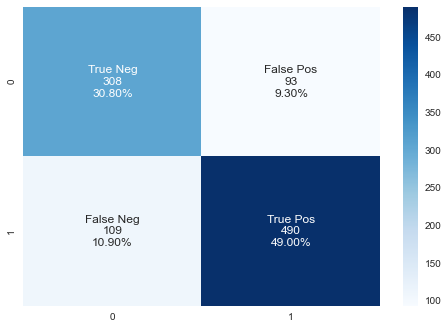

In [44]:
#Visualisasi untuk Confusion Matrix algoritma SVM
import seaborn as sns

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm_svm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm_svm.flatten()/np.sum(cm_svm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_svm, annot=labels, fmt='', cmap='Blues')

# KNN

In [45]:
text_clf_knn = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', KNeighborsClassifier())])

tuned_parameters_knn = {
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
#   'tfidf__use_idf': (True, False),
#   'tfidf__norm': ('l1', 'l2'),
#   'tfidf__smooth_idf': (True, False),
#   'tfidf__sublinear_tf': (True, False),
    'clf__n_neighbors' : [3,4,5,7,8,9,10],
#     n = 9
#   'clf__leaf_size' : np.arange(1,41,8),
#     'clf__p' : [2,3,4,6],
    'clf__weights' :  ['uniform', 'distance'],
    'clf__metric' : ['minkowski', 'chebyshev','euclidean','manhattan'],
#     'clf__n_jobs' : [1, -1]
}


In [46]:
t = time()
#Training the model
cv = KFold(n_splits=10, shuffle=True, random_state=1)
clf_knn = GridSearchCV(text_clf_knn, tuned_parameters_knn, scoring = 'accuracy',cv=cv, n_jobs = -1, return_train_score=True)

#Fit the model
clf_knn.fit(X_train,y_train)


training_time = time() - t

print("train time: %0.3fs" % training_time)

train time: 60.101s


In [47]:
print("Best parameters set found on development set:")
print(clf_knn.best_params_)
print("Best Score:", clf_knn.best_score_)
print('\n')

means = clf_knn.cv_results_['mean_test_score']
stds = clf_knn.cv_results_['std_test_score']
params = clf_knn.cv_results_['params']
for mean, stdev, param in zip(means,stds,params):
    print("Mean: %f Stdev:(%f) with: %r" % (mean,stdev,param))

Best parameters set found on development set:
{'clf__metric': 'minkowski', 'clf__n_neighbors': 5, 'clf__weights': 'distance', 'tfidf__ngram_range': (1, 3)}
Best Score: 0.783


Mean: 0.673000 Stdev:(0.036892) with: {'clf__metric': 'minkowski', 'clf__n_neighbors': 3, 'clf__weights': 'uniform', 'tfidf__ngram_range': (1, 1)}
Mean: 0.714000 Stdev:(0.036932) with: {'clf__metric': 'minkowski', 'clf__n_neighbors': 3, 'clf__weights': 'uniform', 'tfidf__ngram_range': (1, 2)}
Mean: 0.731000 Stdev:(0.023854) with: {'clf__metric': 'minkowski', 'clf__n_neighbors': 3, 'clf__weights': 'uniform', 'tfidf__ngram_range': (1, 3)}
Mean: 0.743000 Stdev:(0.041725) with: {'clf__metric': 'minkowski', 'clf__n_neighbors': 3, 'clf__weights': 'distance', 'tfidf__ngram_range': (1, 1)}
Mean: 0.772000 Stdev:(0.039950) with: {'clf__metric': 'minkowski', 'clf__n_neighbors': 3, 'clf__weights': 'distance', 'tfidf__ngram_range': (1, 2)}
Mean: 0.781000 Stdev:(0.028792) with: {'clf__metric': 'minkowski', 'clf__n_neighbors': 

In [48]:
result_knn = pd.DataFrame(clf_knn.cv_results_['params'])
result_knn['test_score'] = clf_knn.cv_results_['mean_test_score']
result_knn['train_score'] = clf_knn.cv_results_['mean_train_score']
result_knn

,clf__metric,clf__n_neighbors,clf__weights,tfidf__ngram_range,test_score,train_score
0,minkowski,3,uniform,"(1, 1)",0.673,0.849000
1,minkowski,3,uniform,"(1, 2)",0.714,0.868556
2,minkowski,3,uniform,"(1, 3)",0.731,0.871778
3,minkowski,3,distance,"(1, 1)",0.743,1.000000
4,minkowski,3,distance,"(1, 2)",0.772,1.000000
...,...,...,...,...,...,...
163,manhattan,10,uniform,"(1, 2)",0.593,0.756667
164,manhattan,10,uniform,"(1, 3)",0.663,0.869333
165,manhattan,10,distance,"(1, 1)",0.737,1.000000
166,manhattan,10,distance,"(1, 2)",0.730,1.000000


In [49]:
from sklearn.model_selection import GridSearchCV

t = time()
#training the model
knn = Pipeline([('tfidf', TfidfVectorizer(ngram_range=(1,3))),
#                 ,norm='l1'
# ,smooth_idf=True,sublinear_tf=True, use_idf=True
#                  ('sampling',ADASYN()),
                ('clf', KNeighborsClassifier(n_neighbors=8, metric='minkowski', weights='distance'))])
# metric='minkowski', n_jobs=1, p=2, weights='distance',

knn.fit(X_train,y_train)

training_time = time() - t

print("train time: %0.3fs" % training_time)

print("================================")
print("Hasil Score data train : ", knn.score(X_train,y_train))
print("Hasil Score data test : ", knn.score(X_test,y_test))

train time: 0.062s
Hasil Score data train :  1.0
Hasil Score data test :  0.796


In [50]:

cv = KFold(n_splits=10, shuffle=True, random_state=1)
accuracy = cross_val_score(knn, X_train, y_train, scoring = 'accuracy', cv = cv)
print('cross validation score', accuracy)

#compute average cross-validation score
print('Average cross-validation Mean Score : {:.4f}'.format(accuracy.mean()))

#compute average cross-validation score
print('Average cross-validation Std Score : {:.4f}'.format(accuracy.std()))

cross validation score [0.79 0.81 0.8  0.75 0.7  0.78 0.8  0.79 0.78 0.75]
Average cross-validation Mean Score : 0.7750
Average cross-validation Std Score : 0.0314


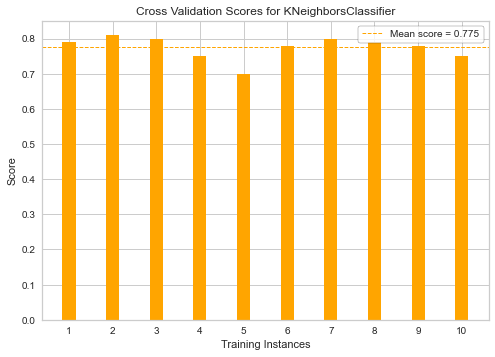

<AxesSubplot:title={'center':'Cross Validation Scores for KNeighborsClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [51]:
#!pip install yellowbrick

from yellowbrick.model_selection import CVScores
import warnings
warnings.filterwarnings('ignore')

cv = KFold(n_splits=10, shuffle=True, random_state=1)
visualizer = CVScores(knn, cv=cv, scoring='accuracy',color="orange")

visualizer.fit(X_train,y_train)
visualizer.show()

In [52]:
t = time()
#get predictions from model

#get predictions from model
y_pred_knn = knn.predict(X_test)
# y_pred_knn = clf_knn.predict(X_test)

test_time = time() - t
print("test time:  %0.3fs" % test_time)
print("========================")

print(classification_report(y_test, y_pred_knn))
print('\n')

#print('BEST KNN MODEL')
print('Accuracy Score - KNN:', metrics.accuracy_score(y_test, y_pred_knn)) 
#print('MAE Score:', mean_absolute_error(y_test, y_pred_knn)) 
#print('MSE Score', mean_squared_error(y_test, y_pred_knn))

test time:  0.086s
              precision    recall  f1-score   support

           0       0.75      0.73      0.74       401
           1       0.82      0.84      0.83       599

    accuracy                           0.80      1000
   macro avg       0.79      0.78      0.79      1000
weighted avg       0.80      0.80      0.80      1000



Accuracy Score - KNN: 0.796


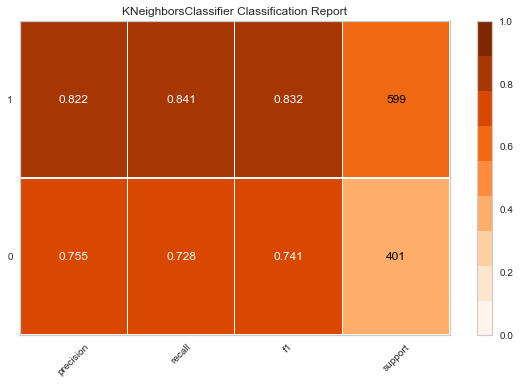

<AxesSubplot:title={'center':'KNeighborsClassifier Classification Report'}>

In [53]:
from yellowbrick.classifier import ClassificationReport

# Instantiate the classification model and visualizer
visualizer = ClassificationReport(knn,support=True,cmap='Oranges')

visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()

,negatif,positif,accuracy,macro avg,weighted avg
precision,0.754522,0.822186,0.796,0.788354,0.795053
recall,0.728180,0.841402,0.796,0.784791,0.796000
f1-score,0.741117,0.831683,0.796,0.786400,0.795366
support,401.000000,599.000000,0.796,1000.000000,1000.000000


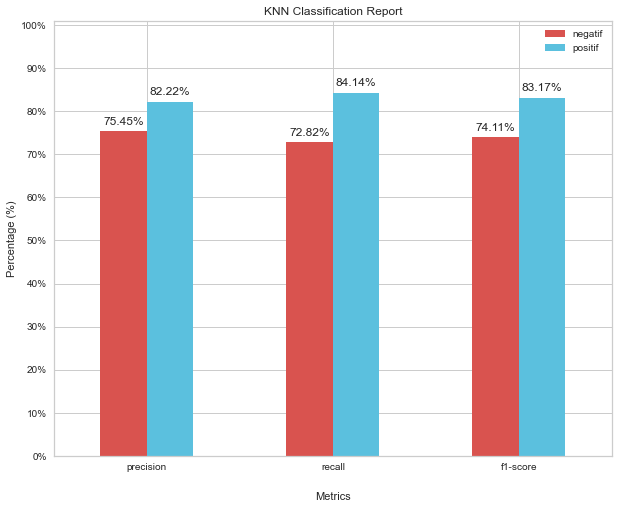

In [54]:
#create labels to be used and columns for a confusion matrix downstream
target_labels = ['negatif', 'positif']

#store the classification report as a dictionary
cr_dict = classification_report(y_test, y_pred_knn, target_names=target_labels, output_dict=True)

#convert the classification report dictionary into a data frame
cr_data = pd.DataFrame(cr_dict)
display(cr_data)

#plot the classification report scores
ax = cr_data.iloc[:-1, :2].plot.bar(figsize=(10,8),color=['#d9534f','#5bc0de'])
plt.title("KNN Classification Report")
plt.xlabel('Metrics', labelpad=20)

#fix the x-tick mark rotation
plt.xticks(rotation=0)

#create custom y-tick marks and labels for percentage representation
#create an array of even tick marks from 0 to 1
percent_ticks = np.linspace(0,1,11, endpoint=True)

#create a list of strings representing the percentage at each tick
percent_labels = [f'{int(t*100)}%' for t in percent_ticks]
plt.yticks(ticks=percent_ticks,labels=percent_labels)
plt.ylabel('Percentage (%)')
plt.margins(0.2,0.2)

for p in ax.patches:
    ax.annotate(
        "{}%".format(str(np.round(p.get_height()*100, 2))),
        xy=(p.get_x()*1+p.get_width()/2, p.get_height()*1.02),
        ha='center',
    )

In [55]:
from sklearn.metrics import confusion_matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
print(cm_knn)

[[292 109]
 [ 95 504]]


In [56]:
def calculate_sensitivity_specificity(y_test, y_pred_test):
    # Note: More parameters are defined than necessary. 
    # This would allow return of other measures other than sensitivity and specificity
    
    # Get true/false for whether a breach actually occurred
    actual_pos = y_test == 1
    actual_neg = y_test == 0
    
    # Get true and false test (true test match actual, false tests differ from actual)
    true_pos = (y_pred_knn == 1) & (actual_pos)
    false_pos = (y_pred_knn == 1) & (actual_neg)
    true_neg = (y_pred_knn == 0) & (actual_neg)
    false_neg = (y_pred_knn == 0) & (actual_pos)
    
    # Calculate accuracy
    accuracy_knn = np.mean(y_pred_test == y_test)
    
    # Calculate sensitivity and specificity
    sensitivity_knn = np.sum(true_pos) / np.sum(actual_pos)
    specificity_knn = np.sum(true_neg) / np.sum(actual_neg)
    
    return sensitivity_knn, specificity_knn, accuracy_knn

In [57]:
sensitivity_knn, specificity_knn, accuracy_knn = calculate_sensitivity_specificity(y_test, y_pred_knn)
print ('Sensitivity:', sensitivity_knn)
print ('Specificity:', specificity_knn)
print ('Accuracy:', accuracy_knn)

Sensitivity: 0.8414023372287145
Specificity: 0.7281795511221946
Accuracy: 0.796


<AxesSubplot:>

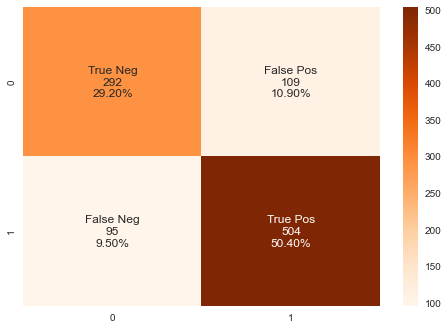

In [58]:
import seaborn as sns

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm_knn.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm_knn.flatten()/np.sum(cm_knn)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_knn, annot=labels, fmt='', cmap='Oranges')

,MNB,SVM,KNN
Accuracy,0.79,0.798,0.796


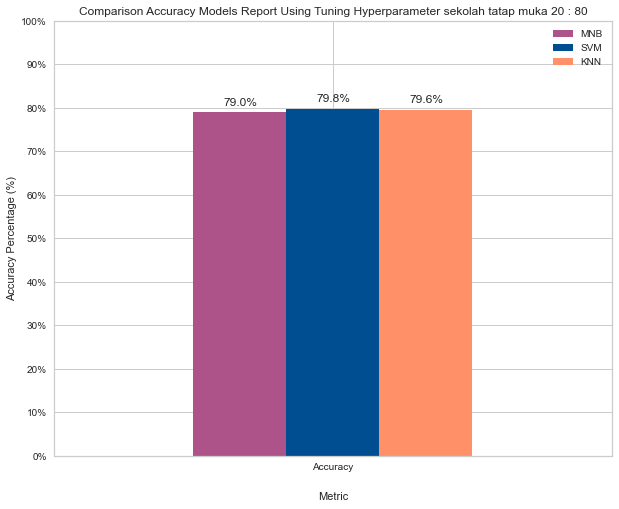

In [59]:
#store the classification report as a dictionary
clf_mnb = metrics.accuracy_score(y_test, y_pred_mnb)
clf_svm = metrics.accuracy_score(y_test, y_pred_svm)
clf_knn = metrics.accuracy_score(y_test, y_pred_knn)
cr_dict = [clf_mnb, clf_svm, clf_knn]

#convert the classification report dictionary into a data frame
cr_data = pd.DataFrame({
    "MNB":[clf_mnb],
    "SVM":[clf_svm],
    "KNN":[clf_knn],
},
index = ["Accuracy"])
display(cr_data)

ax = cr_data.plot.bar(figsize=(10,8),color=['#ad5389','#004e92', '#ff9068'])
#plt.bar(cr_data, figsize=(10,8),color=['#5bc0de', '#d8634f'])
plt.title("Comparison Accuracy Models Report Using Tuning Hyperparameter sekolah tatap muka 20 : 80")
plt.xlabel('Metric', labelpad=20)

#fix the x-tick mark rotation
plt.xticks(rotation=0)

#create custom y-tick marks and labels for percentage representation
#create an array of even tick marks from 0 to 1
percent_ticks = np.linspace(0,1,11, endpoint=True)

#create a list of strings representing the percentage at each tick
percent_labels = [f'{int(t*100)}%' for t in percent_ticks]
plt.yticks(ticks=percent_ticks,labels=percent_labels)
plt.ylabel('Accuracy Percentage (%)')

for p in ax.patches:
    ax.annotate(
        "{}%".format(str(np.round(p.get_height()*100, 2))),
        xy=(p.get_x()*1+p.get_width()/2, p.get_height()*1.02),
        ha='center')

In [60]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

#NB
print("MultinomialNB")
print("--------------------------")
accuracy_mnb = accuracy_score(y_test, y_pred_mnb)
print('Accuracy: %.3f' % accuracy_mnb)
precision_mnb = precision_score(y_test, y_pred_mnb, average='binary')
print('Precision: %.3f' % precision_mnb)
recall_mnb = recall_score(y_test, y_pred_mnb, average='binary')
print('Recall: %.3f' % recall_mnb)
score_mnb = f1_score(y_test, y_pred_mnb, average='binary')
print('F-Measure: %.3f' % score_mnb)
print("==========================")
#====================
#SVM
print("SVM")
print("--------------------------")
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print('Accuracy: %.3f' % accuracy_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='binary')
print('Precision: %.3f' % precision_svm)
recall_svm = recall_score(y_test, y_pred_svm, average='binary')
print('Recall: %.3f' % recall_svm)
score_svm = f1_score(y_test, y_pred_svm, average='binary')
print('F-Measure: %.3f' % score_svm)
print("==========================")
#====================
#KNN
print("KNN")
print("--------------------------")
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print('Accuracy: %.3f' % accuracy_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='binary')
print('Precision: %.3f' % precision_knn)
recall_knn = recall_score(y_test, y_pred_knn, average='binary')
print('Recall: %.3f' % recall_knn)
score_knn = f1_score(y_test, y_pred_knn, average='binary')
print('F-Measure: %.3f' % score_knn)
print("==========================")
#=====================

MultinomialNB
--------------------------
Accuracy: 0.790
Precision: 0.824
Recall: 0.826
F-Measure: 0.825
SVM
--------------------------
Accuracy: 0.798
Precision: 0.840
Recall: 0.818
F-Measure: 0.829
KNN
--------------------------
Accuracy: 0.796
Precision: 0.822
Recall: 0.841
F-Measure: 0.832


In [117]:
acc_tuning_2080_sekolah = [accuracy_mnb,accuracy_svm,accuracy_knn]

In [118]:
#convert the classification report dictionary into a data frame
cr_data = pd.DataFrame({
    "MNB":[accuracy_mnb,precision_mnb,recall_mnb,score_mnb],
    "SVM":[accuracy_svm,precision_svm,recall_mnb,score_svm],
    "KNN":[accuracy_knn,precision_knn,recall_mnb,score_knn],
},
index = ["accuracy","precision","recall","f1-score"])
display(cr_data)

,MNB,SVM,KNN
accuracy,0.862500,0.872500,0.847500
precision,0.883534,0.922078,0.859922
recall,0.894309,0.894309,0.894309
f1-score,0.888889,0.893082,0.878728


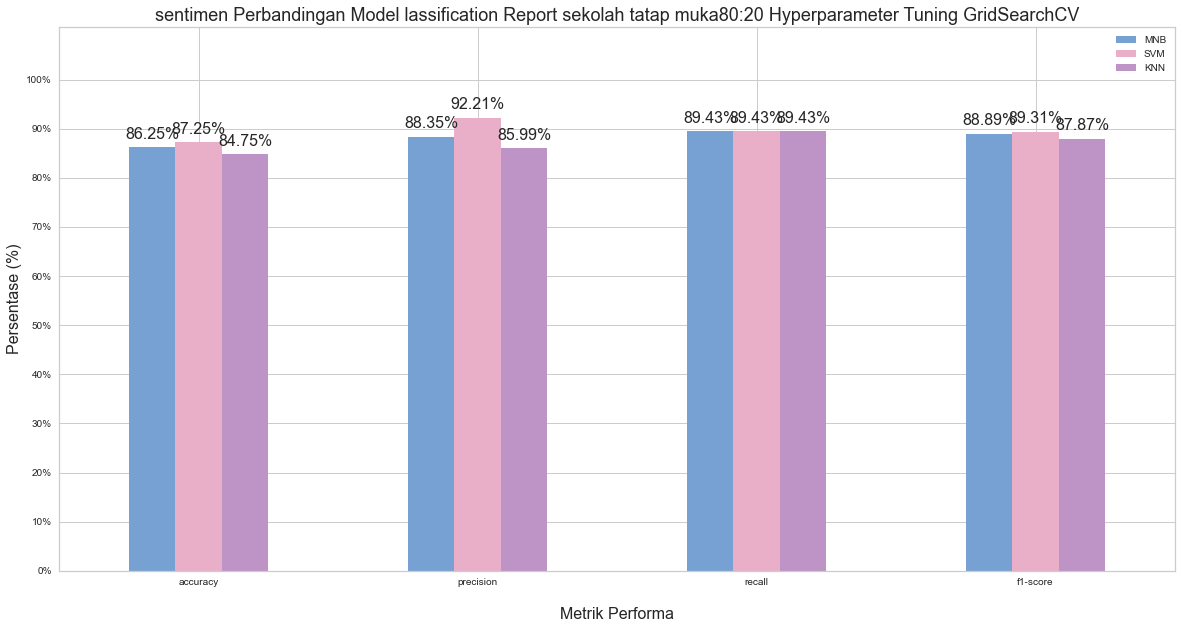

In [119]:

#plot the classification report scores
ax = cr_data.iloc[:, :4].plot.bar(figsize=(20,10),color=['#77A1D3','#eaafc8', '#BE93C5'])
plt.title("sentimen Perbandingan Model lassification Report sekolah tatap muka80:20 Hyperparameter Tuning GridSearchCV", fontsize=18,ha='center')
plt.xlabel('Metrik Performa', labelpad=20, fontsize=16,ha='center')

#fix the x-tick mark rotation
plt.xticks(rotation=0)

#create custom y-tick marks and labels for percentage representation
#create an array of even tick marks from 0 to 1
percent_ticks = np.linspace(0,1,11, endpoint=True)

#create a list of strings representing the percentage at each tick
percent_labels = [f'{int(t*100)}%' for t in percent_ticks]
plt.yticks(ticks=percent_ticks,labels=percent_labels)
plt.ylabel('Persentase (%)', fontsize=16,ha='center')
plt.margins(0.2,0.2)

for p in ax.patches:
    ax.annotate(
        "{}%".format(str(np.round(p.get_height()*100, 2))),
        xy=(p.get_x()*1+p.get_width()/2, p.get_height()*1.02),
         fontsize=16, ha='center',
    )